Null Hypothesis- There is no difference in the provicial examination grades in Public or independent highschools in BC
Alternate Hypthesis- In BC, Independent highschools has higher provicial examination grades than Public highschools.

In [1]:
library(tidyverse)
library(infer)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘infer’ was built under R version 4.0.2”


In [2]:
exam_data <- read_delim("https://raw.githubusercontent.com/michelleykim/bc_exams_analysis/main/data/provincial-required-examinations-2016_2017_to_2019_2020.csv", delim = ",")
exam_test<-exam_data %>% 
select(PUBLIC_OR_INDEPENDENT) %>% 
group_by(PUBLIC_OR_INDEPENDENT) %>% 
            summarize(n=n())

exam_test

Parsed with column specification:
cols(
  .default = col_character(),
  SCHOOL_NUMBER = col_logical(),
  SCHOOL_NAME = col_logical(),
  GRADE = col_double()
)

See spec(...) for full column specifications.

Warning message:
“81714 parsing failures.
 row           col           expected                actual                                                                                                                                     file
2314 SCHOOL_NUMBER 1/0/T/F/TRUE/FALSE 00502001              'https://raw.githubusercontent.com/michelleykim/bc_exams_analysis/main/data/provincial-required-examinations-2016_2017_to_2019_2020.csv'
2314 SCHOOL_NAME   1/0/T/F/TRUE/FALSE Mount Baker Secondary 'https://raw.githubusercontent.com/michelleykim/bc_exams_analysis/main/data/provincial-required-examinations-2016_2017_to_2019_2020.csv'
2315 SCHOOL_NUMBER 1/0/T/F/TRUE/FALSE 00502001              'https://raw.githubusercontent.com/michelleykim/bc_exams_analysis/main/data/provincial-required-exam

PUBLIC_OR_INDEPENDENT,n
<chr>,<int>
BC Independent School,7377
BC Public School,41316
Province-Total,225


In [3]:
#get the data we will be using
exam_school_type <- exam_data  %>% 
                    select(PUBLIC_OR_INDEPENDENT, AVERAGE_PERCENT, MARK_TYPE, EXAM_SUBJECT) %>% 
                    filter(AVERAGE_PERCENT != "Msk") %>% 
                    filter(PUBLIC_OR_INDEPENDENT == "BC Public School" |PUBLIC_OR_INDEPENDENT == "BC Independent School") %>%
                    filter(EXAM_SUBJECT == "ENGLISH 12" & MARK_TYPE == "Final Marks" ) %>% 
                    mutate(AVERAGE_PERCENT = as.numeric(AVERAGE_PERCENT))
head(exam_school_type)

PUBLIC_OR_INDEPENDENT,AVERAGE_PERCENT,MARK_TYPE,EXAM_SUBJECT
<chr>,<dbl>,<chr>,<chr>
BC Public School,73.2,Final Marks,ENGLISH 12
BC Public School,68.2,Final Marks,ENGLISH 12
BC Public School,73.6,Final Marks,ENGLISH 12
BC Public School,70.6,Final Marks,ENGLISH 12
BC Public School,73.4,Final Marks,ENGLISH 12
BC Independent School,78.2,Final Marks,ENGLISH 12


In [10]:
#get sample
set.seed(122)
exam_school_type_sample_public <- exam_school_type %>% 
        filter(PUBLIC_OR_INDEPENDENT == "BC Public School") %>% 
        rep_sample_n(size = 40) 

exam_school_type_sample_Independent <- exam_school_type %>% 
        filter(PUBLIC_OR_INDEPENDENT == "BC Independent School") %>% 
        rep_sample_n(size = 40) 

exam_school_type_sample <- rbind(exam_school_type_sample_public, exam_school_type_sample_Independent) %>% 
                        ungroup() %>% 
                        select(-replicate, -MARK_TYPE)
head(exam_school_type_sample)

PUBLIC_OR_INDEPENDENT,AVERAGE_PERCENT,EXAM_SUBJECT
<chr>,<dbl>,<chr>
BC Public School,69.6,ENGLISH 12
BC Public School,68.4,ENGLISH 12
BC Public School,69.1,ENGLISH 12
BC Public School,77.7,ENGLISH 12
BC Public School,72.5,ENGLISH 12
BC Public School,72.3,ENGLISH 12


In [5]:
#getting the mean and standard deviation of average percent for each school type and the diff of their mean (BC Independent School - BC Public School)
data_for_each_catetegory<- exam_school_type_sample %>% 
                group_by(PUBLIC_OR_INDEPENDENT, EXAM_SUBJECT) %>% 
                summarize(mean = mean(AVERAGE_PERCENT),
                          sd = sd(AVERAGE_PERCENT))
obs_diff_in_mean <-   exam_school_type_sample  %>% 
    specify(formula = AVERAGE_PERCENT ~ PUBLIC_OR_INDEPENDENT) %>%
    calculate(stat = "diff in means", order = c("BC Independent School", "BC Public School")) %>% 
    mutate(diff_in_mean = stat) %>% 
    select(-stat)

data_for_each_catetegory
obs_diff_in_mean

`summarise()` regrouping output by 'PUBLIC_OR_INDEPENDENT' (override with `.groups` argument)



PUBLIC_OR_INDEPENDENT,EXAM_SUBJECT,mean,sd
<chr>,<chr>,<dbl>,<dbl>
BC Independent School,ENGLISH 12,79.2775,6.059851
BC Public School,ENGLISH 12,71.9425,4.295787


diff_in_mean
<dbl>
7.335


$title
[1] "Barplot of final scores mean of the 2 school types (Public or Independent)"

attr(,"class")
[1] "labels"

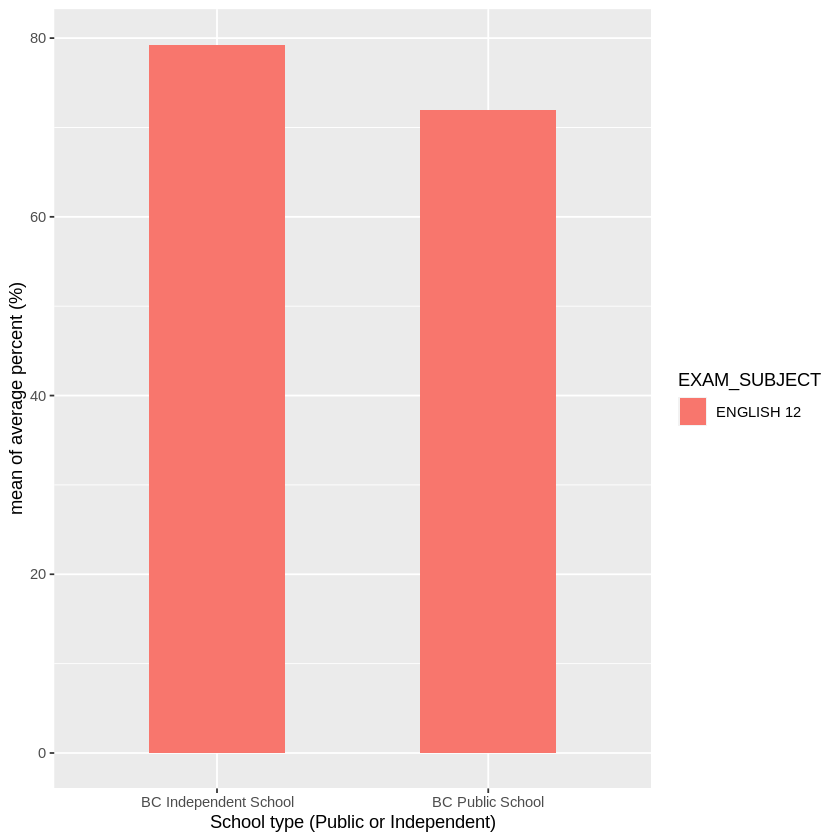

In [6]:
exam_barplot <- data_for_each_catetegory %>%
    ggplot(aes(x = PUBLIC_OR_INDEPENDENT, y = mean, , fill = EXAM_SUBJECT )) +
    geom_bar(stat="identity", position = "dodge", width = 0.5) +
    xlab("School type (Public or Independent)") +
    ylab("mean of average percent (%)")
    ggtitle("Barplot of final scores mean of the 2 school types (Public or Independent)") 
exam_barplot

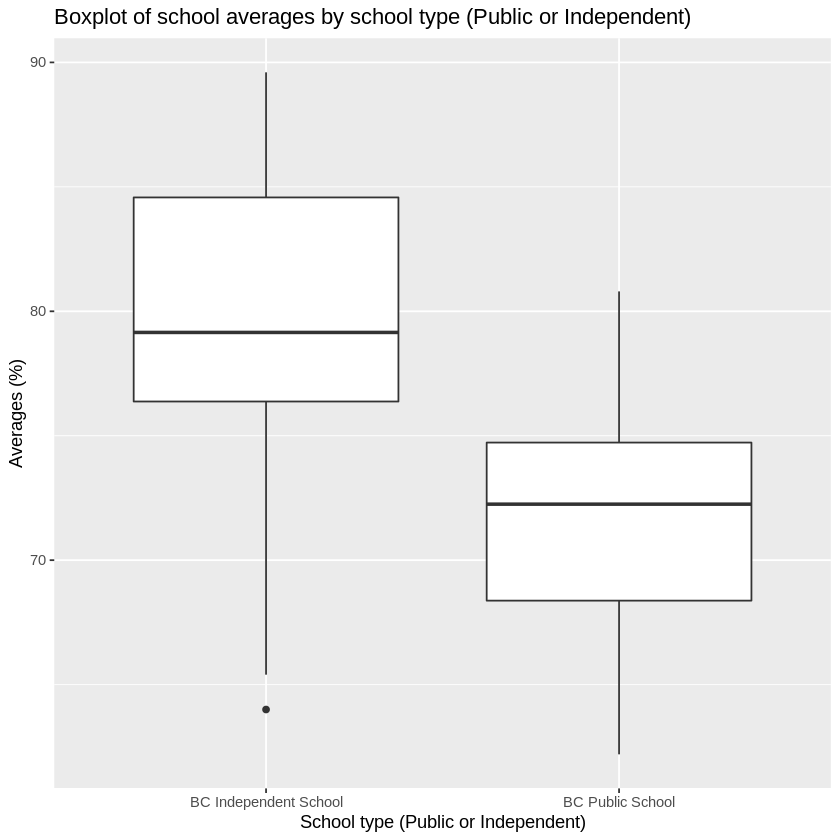

In [8]:
exam_boxplot <- exam_school_type_sample %>%
    ggplot() +
    geom_boxplot(aes(x = PUBLIC_OR_INDEPENDENT, y = AVERAGE_PERCENT)) +
    ggtitle("Boxplot of school averages by school type (Public or Independent)") + 
    xlab("School type (Public or Independent)") + 
    ylab("Averages (%)")

exam_boxplot